In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from pathlib import Path
import networkx as nx
import pickle
import re
from IPython.display import display
from tqdm import tqdm
from skimage import io
import scipy as sp
import os
from scipy.ndimage import distance_transform_edt
import torch
from torch_geometric.utils.convert import from_networkx
from torch_geometric.loader import DataLoader
from IPython.display import clear_output
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
import torch_geometric.transforms as T
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import rand_score
from sklearn.metrics import classification_report
import pandas as pd
import io as IO

import numpy as np
from pathlib import Path
import re
import networkx as nx
import pickle
from skimage import io
from torch_geometric.utils.convert import from_networkx
from torch_geometric.loader import DataLoader
from tqdm import tqdm 
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
from torch_geometric.nn import GraphSAGE
from scipy.ndimage import distance_transform_edt
from os.path import exists

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [47]:
folder = 'GCN_metrics'
files = Path(folder).glob('*.npy')
files = list(files)
files = [x.as_posix() for x in files]
#files

# GCN Best Models

In [48]:
GCN_files = [x for x in files if '_' in x.split('/')[1]]
GCN_files_losses = [x for x in GCN_files if 'rand' in x]
#GCN_files_losses

In [189]:
end_loss = []
best_runs = []
for file in GCN_files_losses[:]:
    loss = np.load(file)
    end_loss.append(np.mean(loss[:-50]))
    if np.mean(loss[:-50]) < 0.65:
        best_runs.append(file)

/lustre06/project/6030665/rozakmat/torch_geom/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/lustre06/project/6030665/rozakmat/torch_geom/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(array([  1.,   6.,  17.,  28.,  39.,  46.,  63., 123., 656., 246.]),
 array([0.48480622, 0.52277094, 0.56073566, 0.59870038, 0.6366651 ,
        0.67462983, 0.71259455, 0.75055927, 0.78852399, 0.82648871,
        0.86445343]),
 <BarContainer object of 10 artists>)

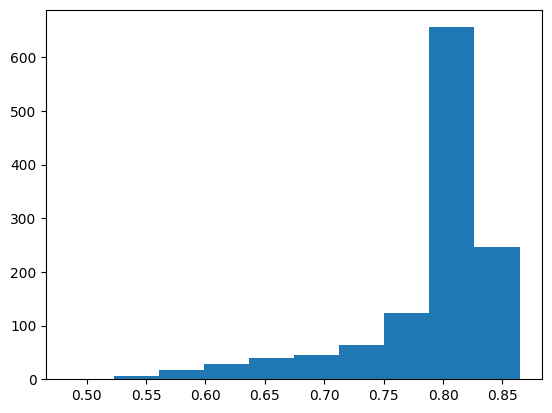

In [190]:
plt.hist(end_loss)

In [191]:
best_runs

['GCN_metrics/GAT37_randScore.npy',
 'GCN_metrics/GAT23_randScore.npy',
 'GCN_metrics/GAT94_randScore.npy',
 'GCN_metrics/GAT269_randScore.npy',
 'GCN_metrics/GAT363_randScore.npy',
 'GCN_metrics/GAT195_randScore.npy',
 'GCN_metrics/GAT220_randScore.npy',
 'GCN_metrics/GAT60_randScore.npy',
 'GCN_metrics/GCN185_randScore.npy',
 'GCN_metrics/GAT15_randScore.npy',
 'GCN_metrics/GAT378_randScore.npy',
 'GCN_metrics/GCN58_randScore.npy',
 'GCN_metrics/GAT406_randScore.npy',
 'GCN_metrics/GAT263_randScore.npy',
 'GCN_metrics/GAT59_randScore.npy',
 'GCN_metrics/GAT38_randScore.npy',
 'GCN_metrics/GAT410_randScore.npy',
 'GCN_metrics/GAT357_randScore.npy',
 'GCN_metrics/GAT99_randScore.npy',
 'GCN_metrics/GAT214_randScore.npy',
 'GCN_metrics/GCN135_randScore.npy',
 'GCN_metrics/GCN98_randScore.npy',
 'GCN_metrics/GAT239_randScore.npy',
 'GCN_metrics/GCN118_randScore.npy',
 'GCN_metrics/GAT198_randScore.npy',
 'GCN_metrics/GAT375_randScore.npy',
 'GCN_metrics/GAT183_randScore.npy',
 'GCN_metri

GCN_metrics/GAT37_randScore.npy


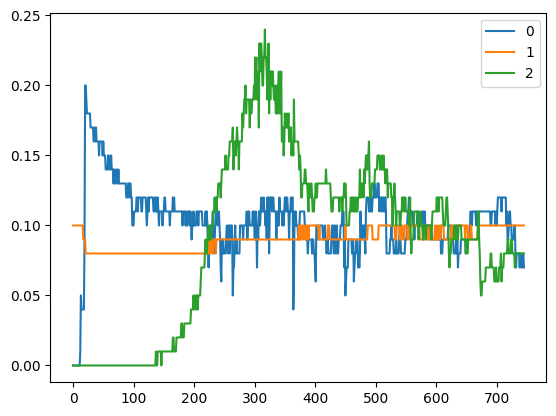

GCN_metrics/GAT23_randScore.npy


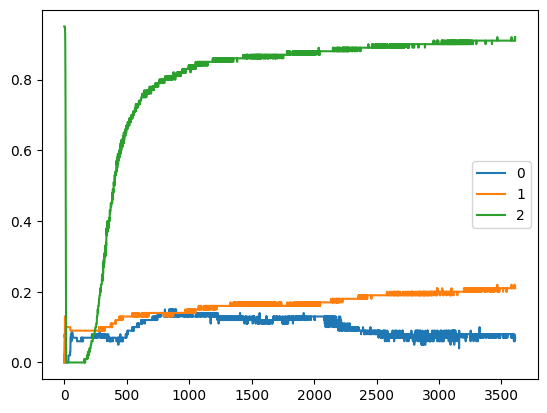

GCN_metrics/GAT94_randScore.npy


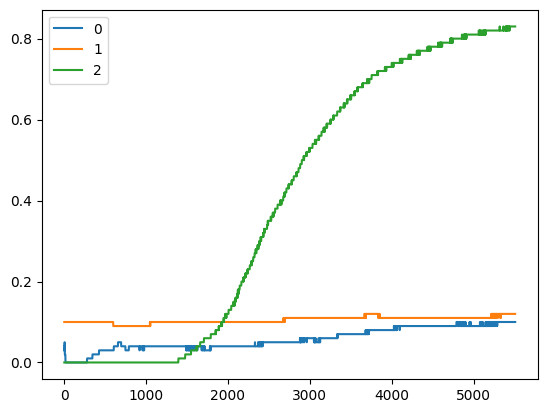

GCN_metrics/GAT269_randScore.npy


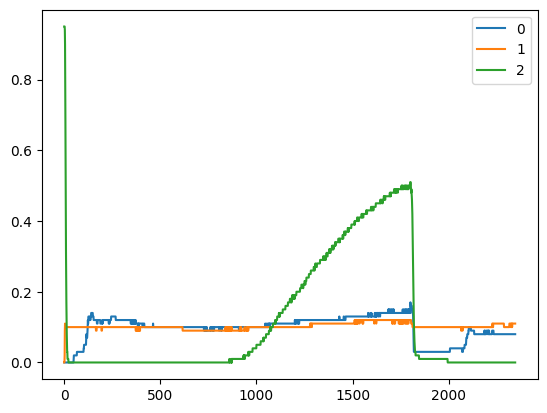

GCN_metrics/GAT363_randScore.npy


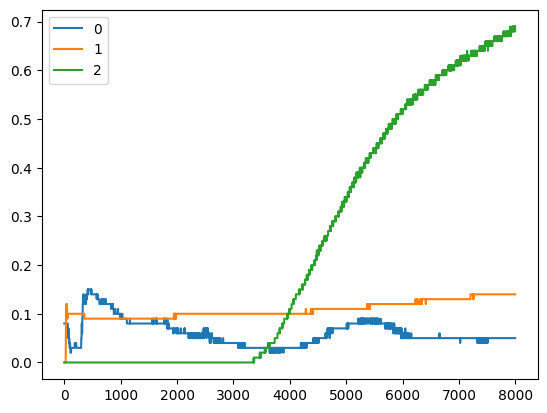

GCN_metrics/GAT195_randScore.npy


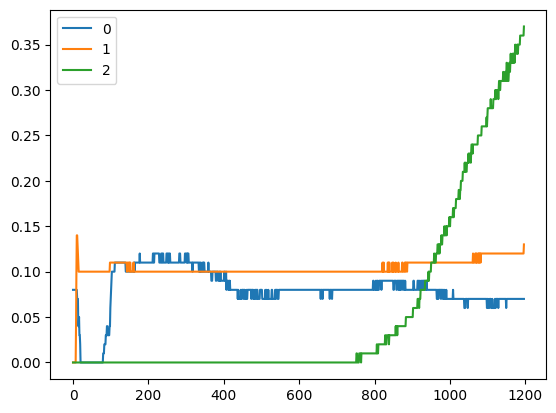

GCN_metrics/GAT220_randScore.npy


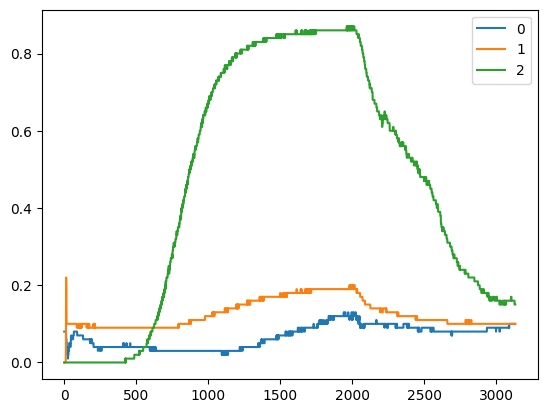

GCN_metrics/GAT60_randScore.npy


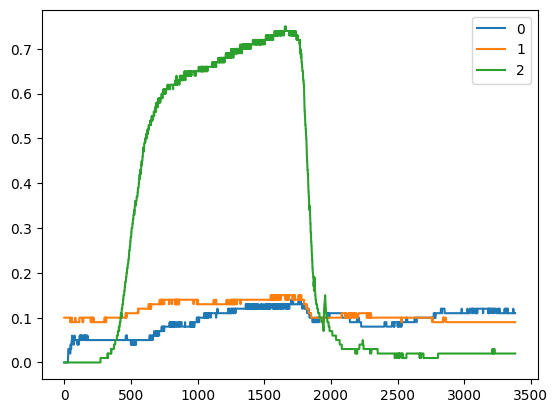

GCN_metrics/GCN185_randScore.npy


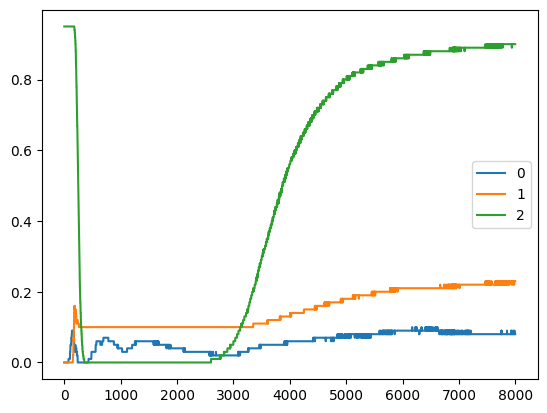

GCN_metrics/GAT15_randScore.npy


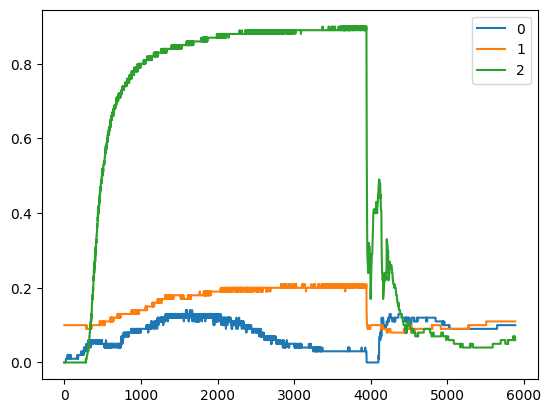

GCN_metrics/GAT378_randScore.npy


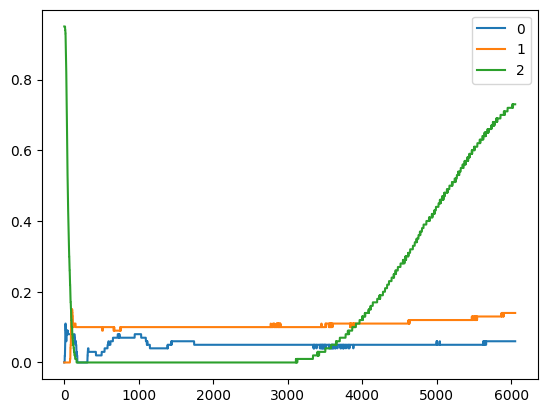

GCN_metrics/GCN58_randScore.npy


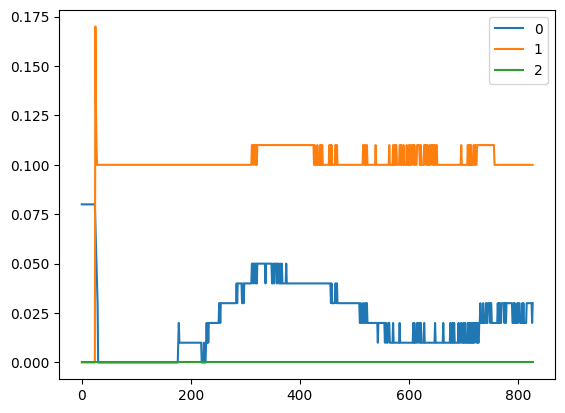

GCN_metrics/GAT406_randScore.npy


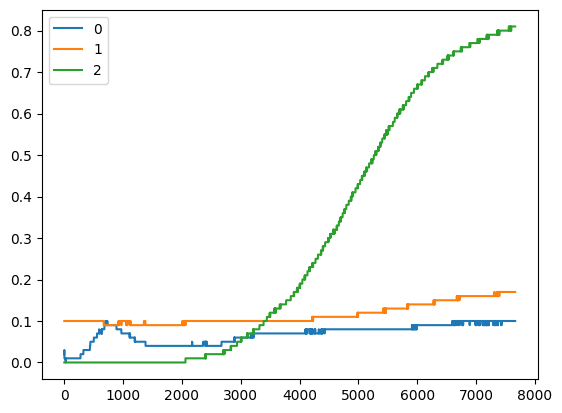

GCN_metrics/GAT263_randScore.npy


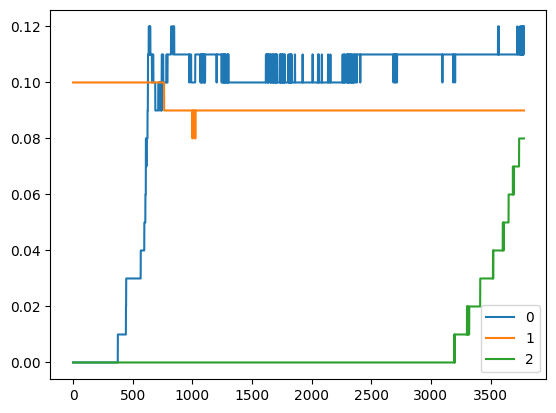

GCN_metrics/GAT59_randScore.npy


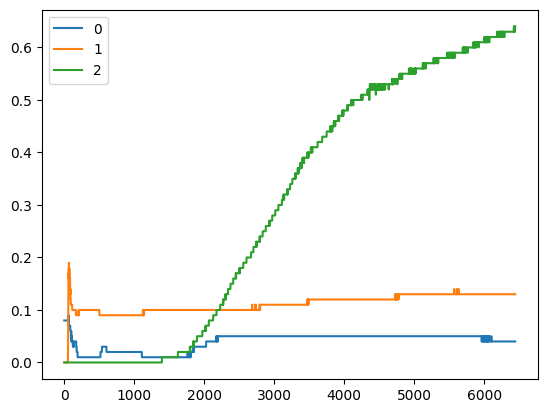

GCN_metrics/GAT38_randScore.npy


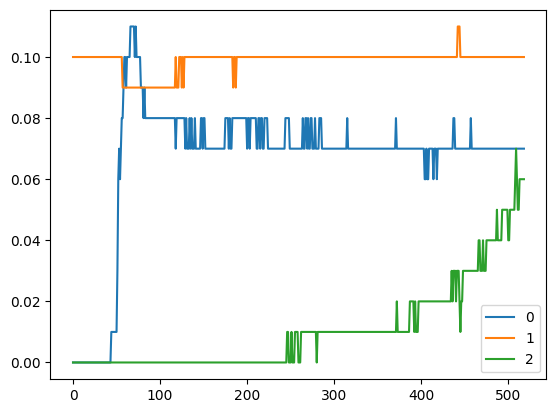

GCN_metrics/GAT410_randScore.npy


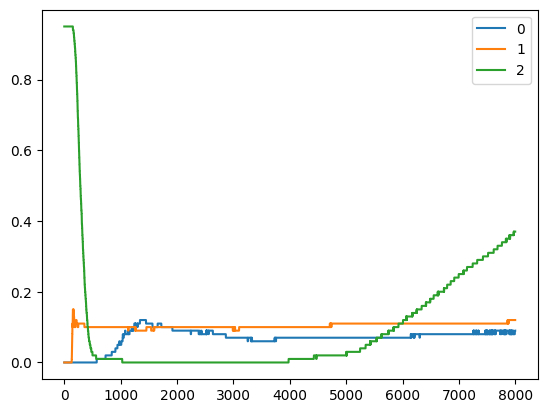

GCN_metrics/GAT357_randScore.npy


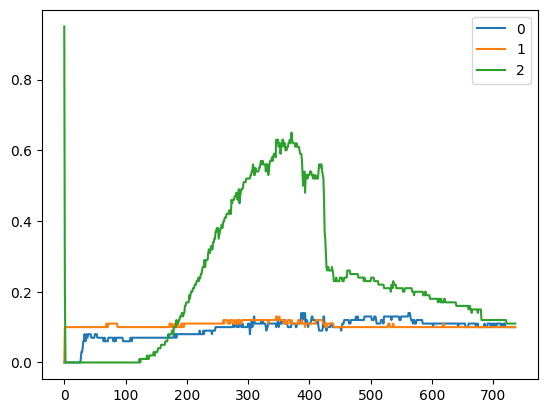

GCN_metrics/GAT99_randScore.npy


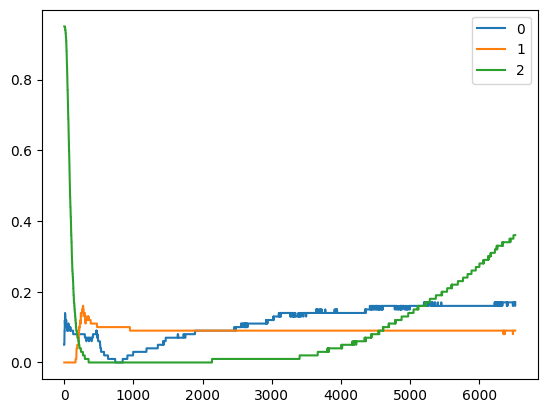

GCN_metrics/GAT214_randScore.npy


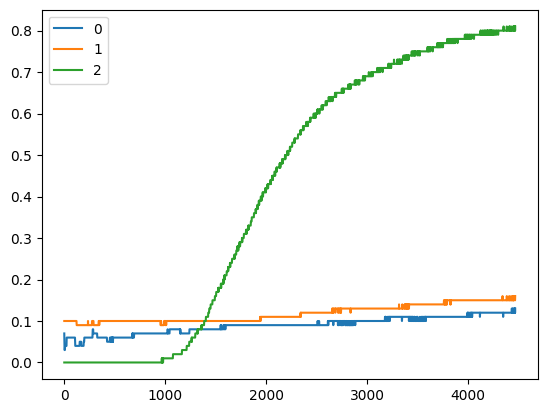

GCN_metrics/GCN135_randScore.npy


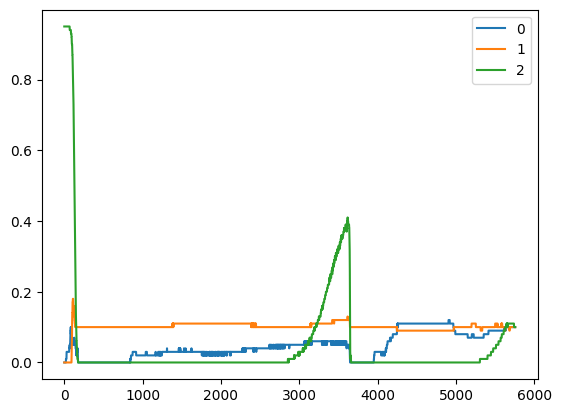

GCN_metrics/GCN98_randScore.npy


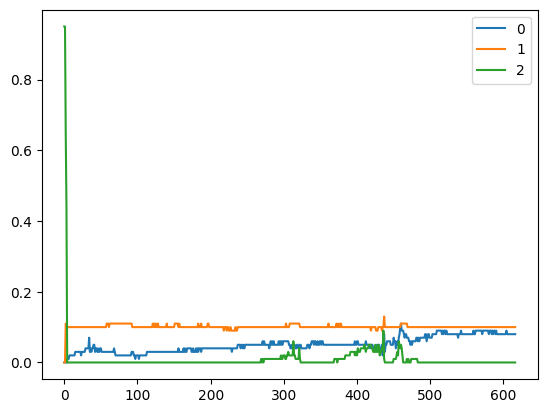

GCN_metrics/GAT239_randScore.npy


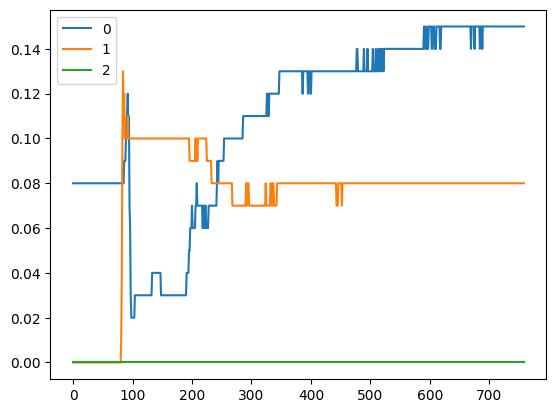

GCN_metrics/GCN118_randScore.npy


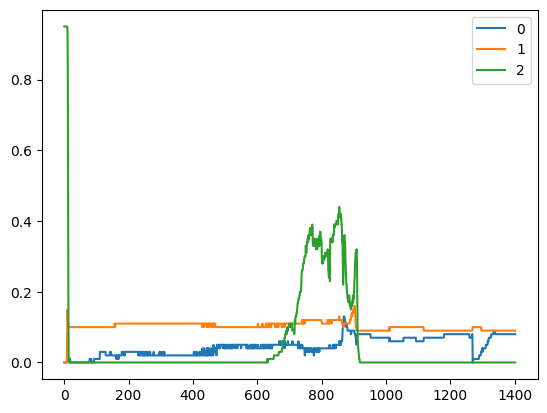

GCN_metrics/GAT198_randScore.npy


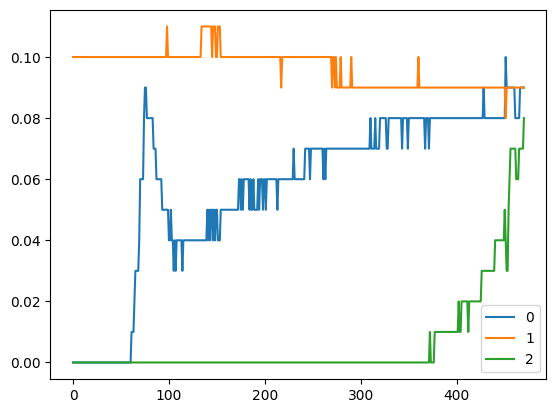

GCN_metrics/GAT375_randScore.npy


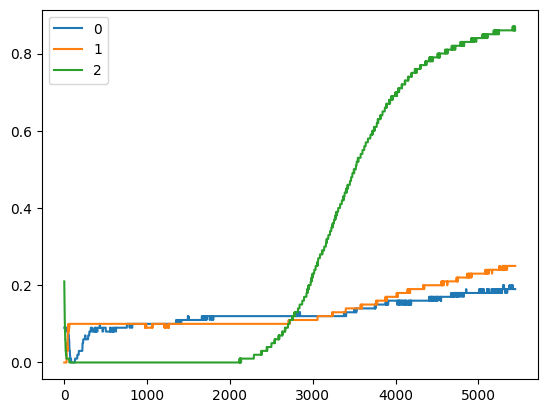

GCN_metrics/GAT183_randScore.npy


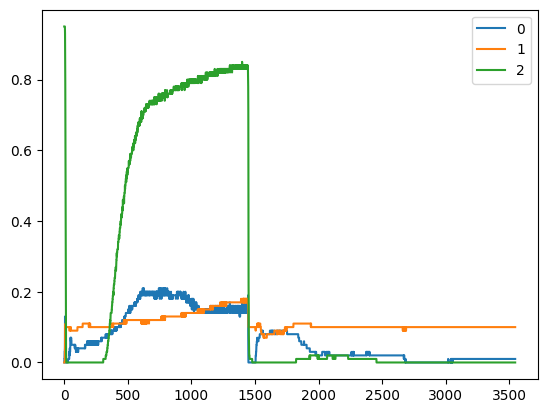

GCN_metrics/GAT30_randScore.npy


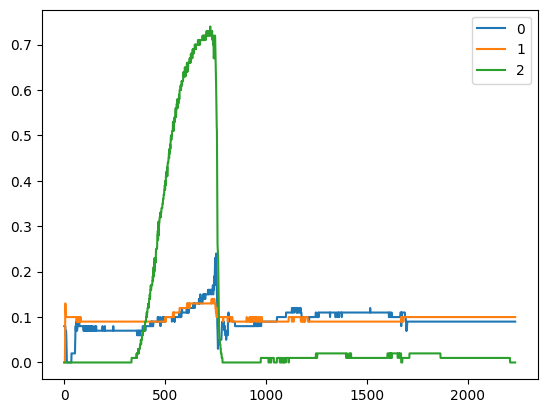

GCN_metrics/GAT87_randScore.npy


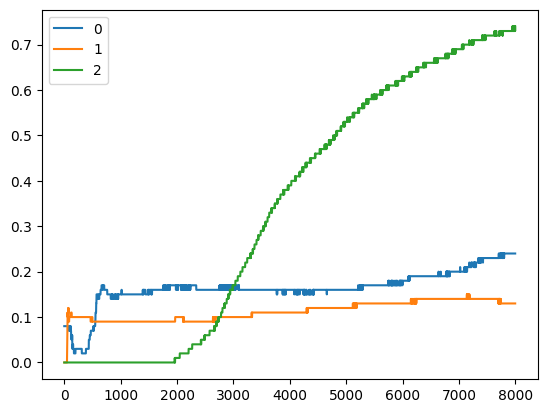

GCN_metrics/GAT18_randScore.npy


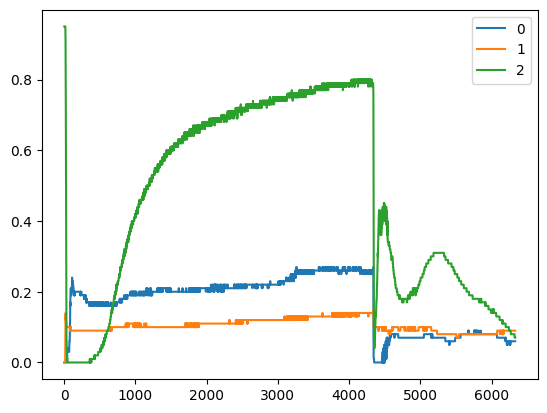

GCN_metrics/GCN215_randScore.npy


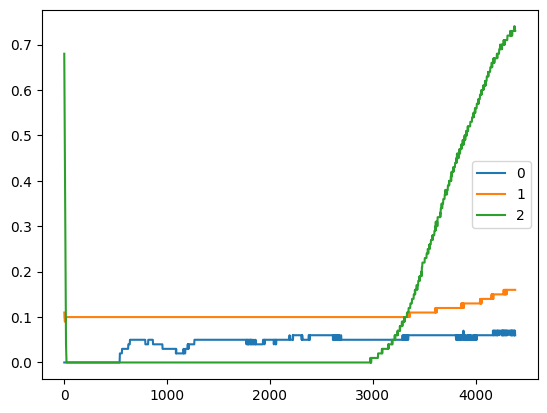

GCN_metrics/GAT35_randScore.npy


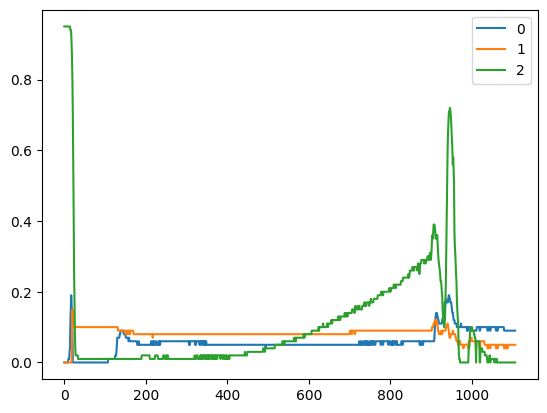

GCN_metrics/GCN31_randScore.npy


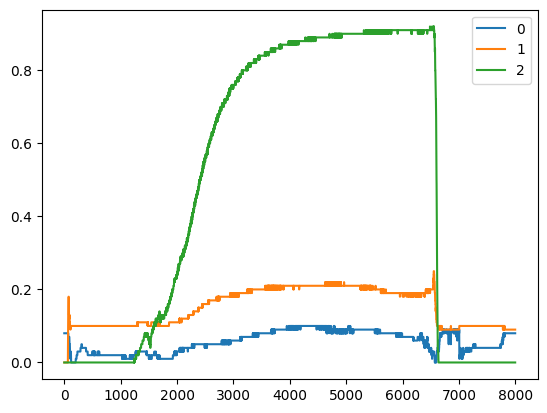

GCN_metrics/GAT186_randScore.npy


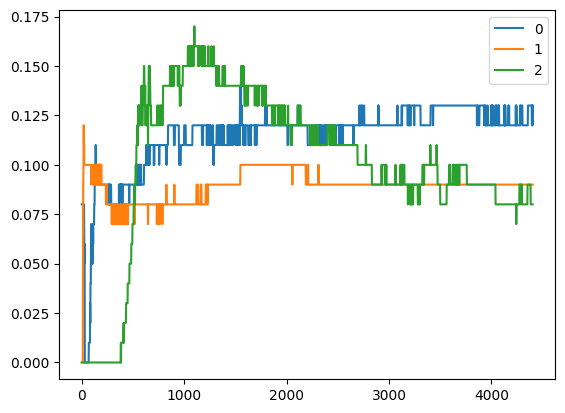

GCN_metrics/GAT178_randScore.npy


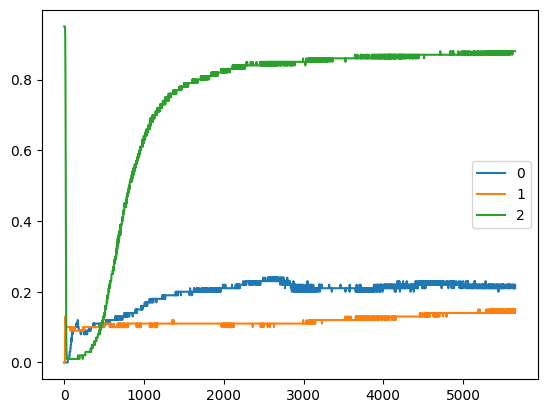

GCN_metrics/GAT54_randScore.npy


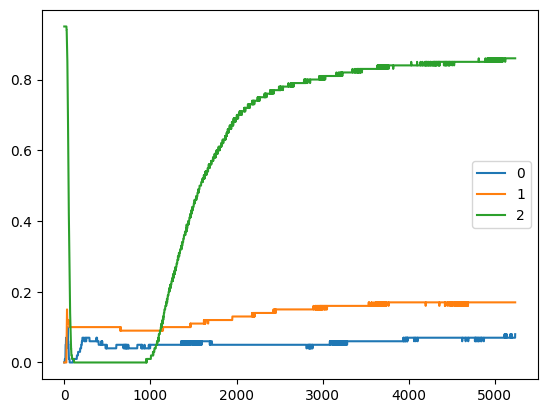

GCN_metrics/GCN210_randScore.npy


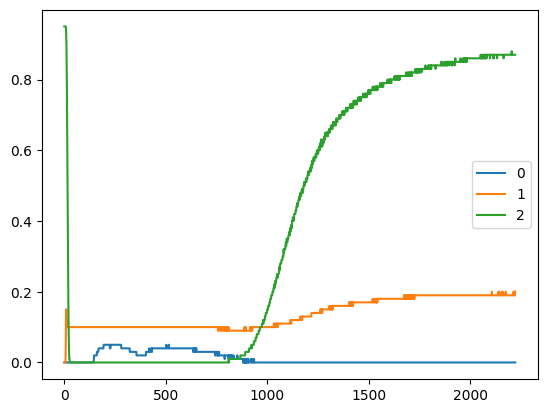

GCN_metrics/GAT68_randScore.npy


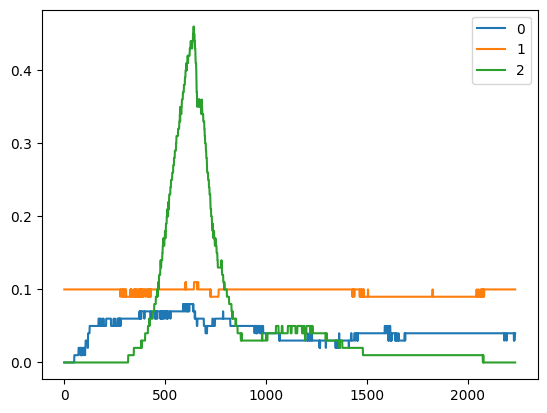

GCN_metrics/GAT422_randScore.npy


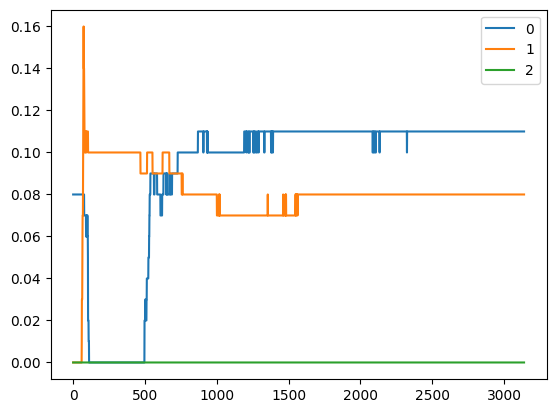

GCN_metrics/GAT179_randScore.npy


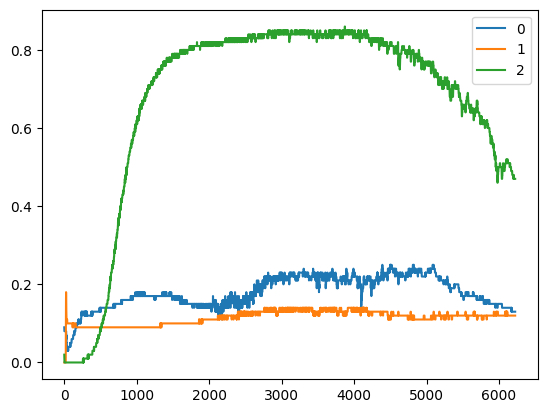

GCN_metrics/GCN18_randScore.npy


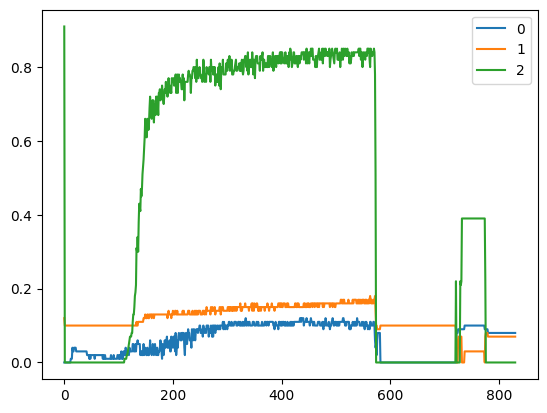

GCN_metrics/GCN198_randScore.npy


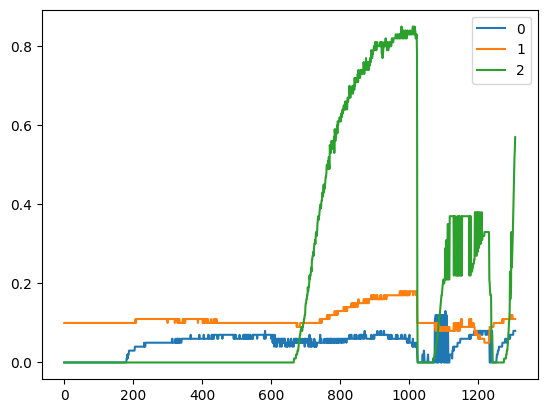

GCN_metrics/GAT247_randScore.npy


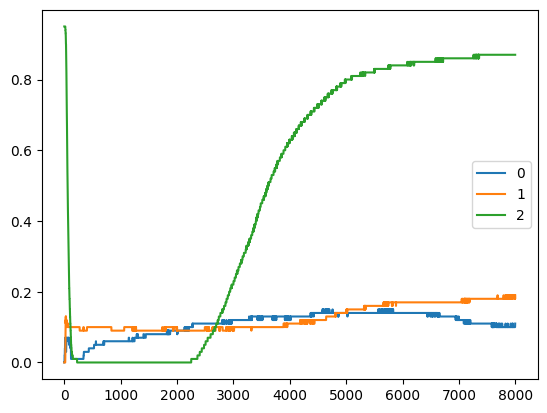

GCN_metrics/GAT374_randScore.npy


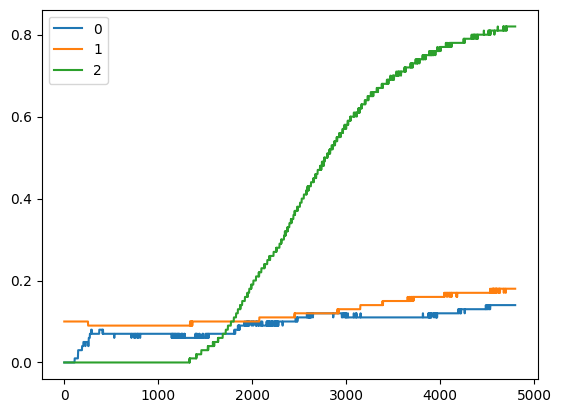

GCN_metrics/GCN21_randScore.npy


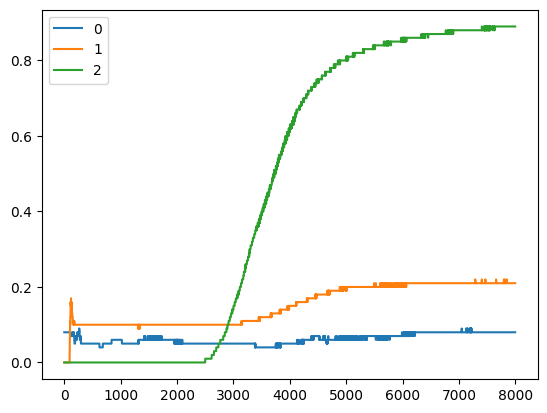

GCN_metrics/GAT50_randScore.npy


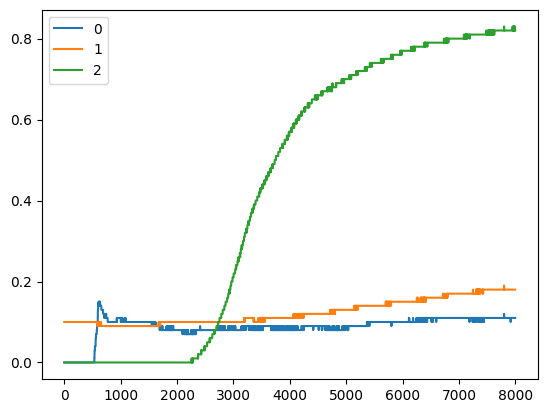

GCN_metrics/GAT31_randScore.npy


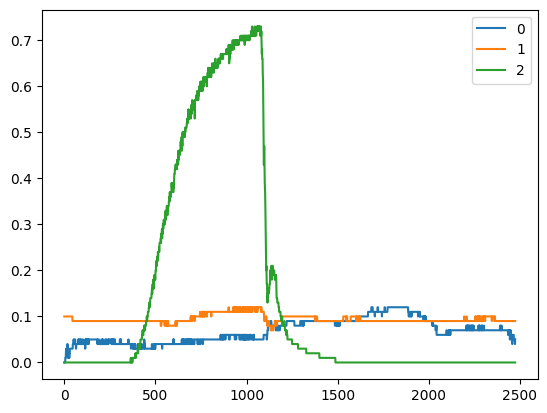

GCN_metrics/GAT237_randScore.npy


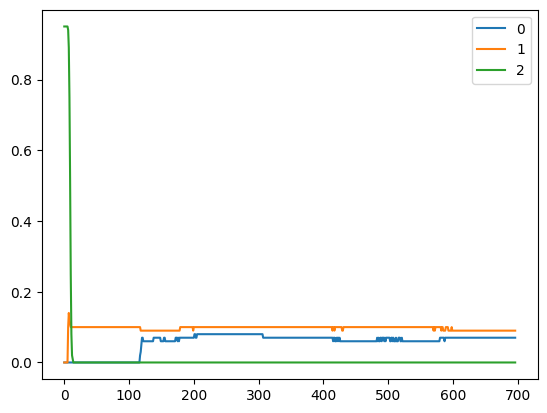

GCN_metrics/GAT242_randScore.npy


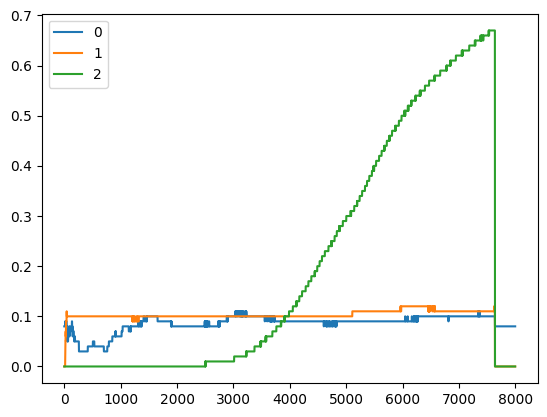

GCN_metrics/GCN189_randScore.npy


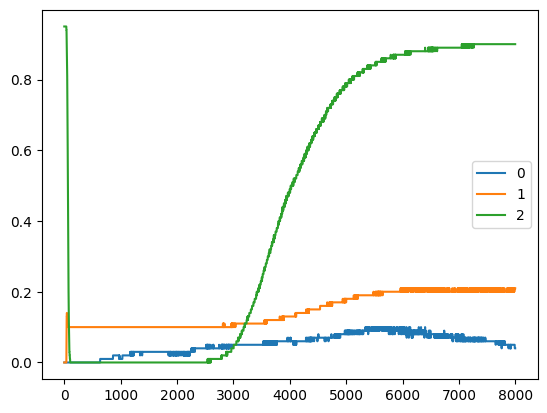

GCN_metrics/GCN131_randScore.npy


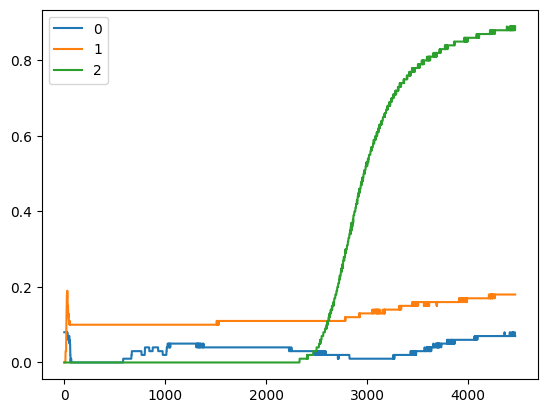

GCN_metrics/GAT356_randScore.npy


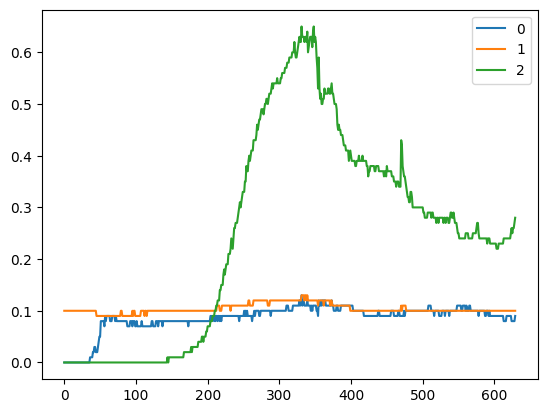

GCN_metrics/GAT342_randScore.npy


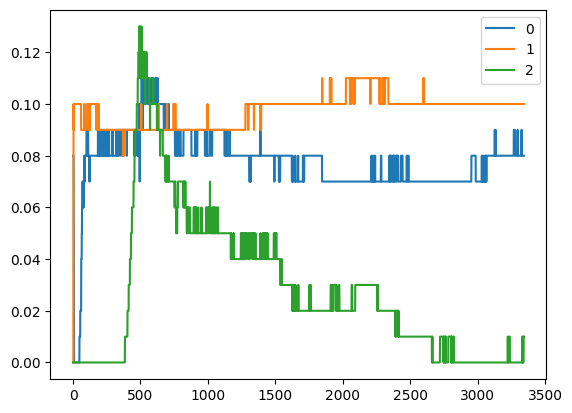

GCN_metrics/GCN195_randScore.npy


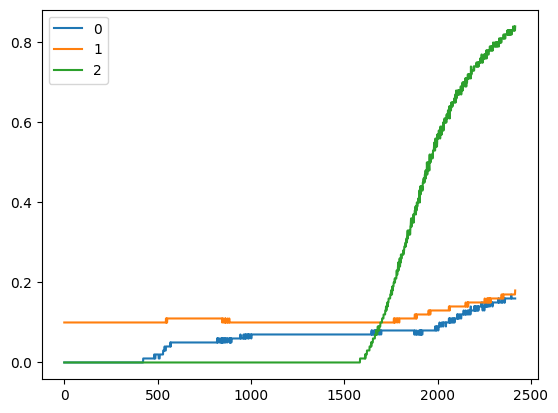

GCN_metrics/GAT407_randScore.npy


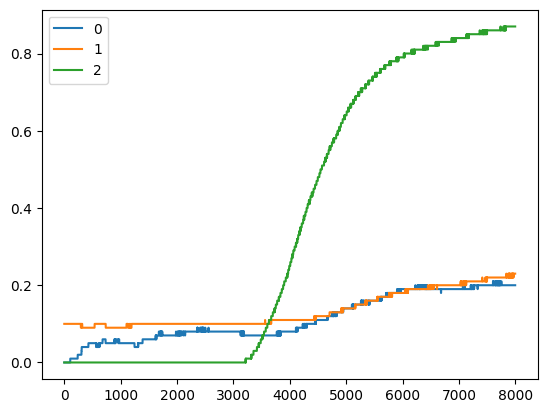

GCN_metrics/GCN29_randScore.npy


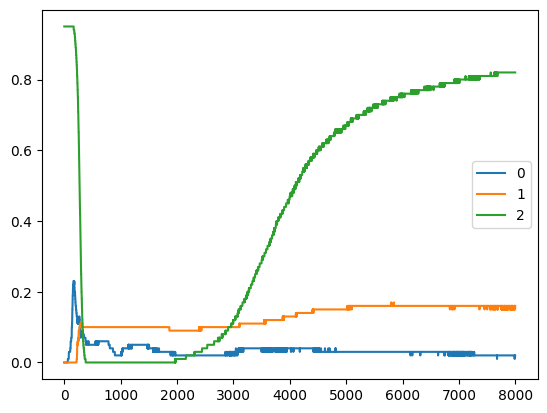

GCN_metrics/GAT58_randScore.npy


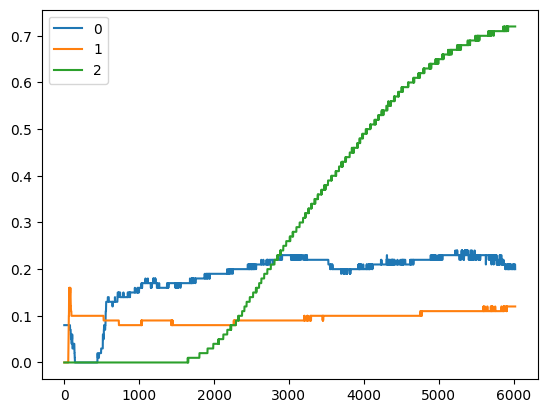

GCN_metrics/GAT174_randScore.npy


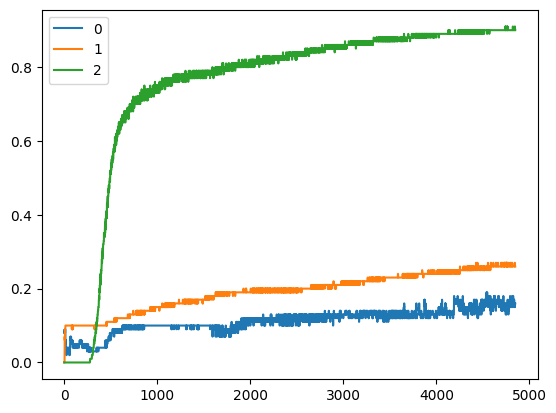

GCN_metrics/GAT203_randScore.npy


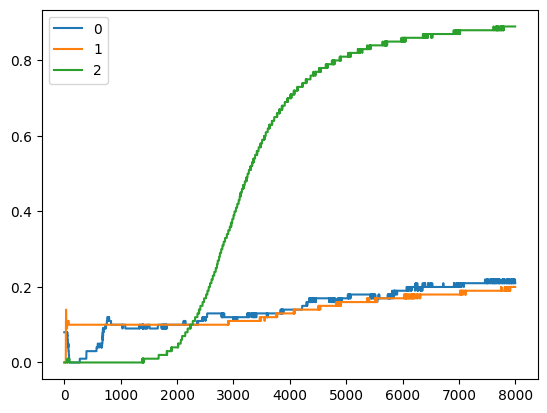

GCN_metrics/GAT387_randScore.npy


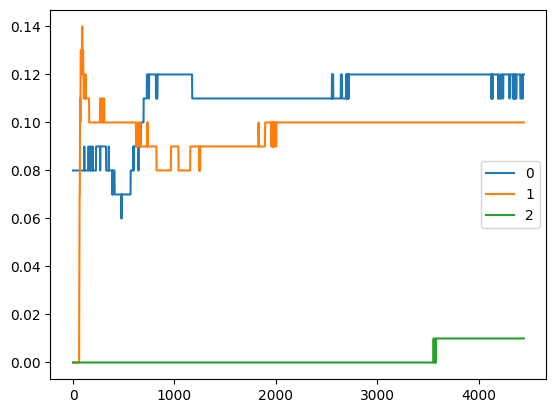

GCN_metrics/GAT419_randScore.npy


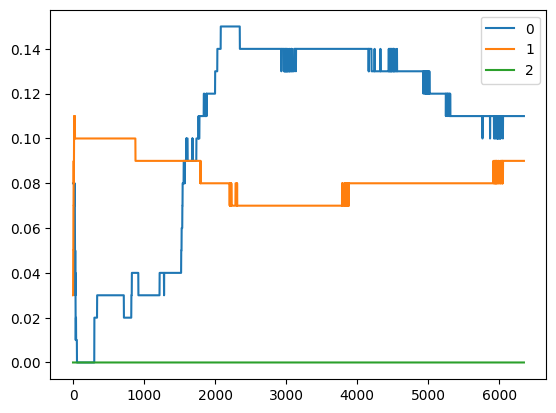

GCN_metrics/GAT90_randScore.npy


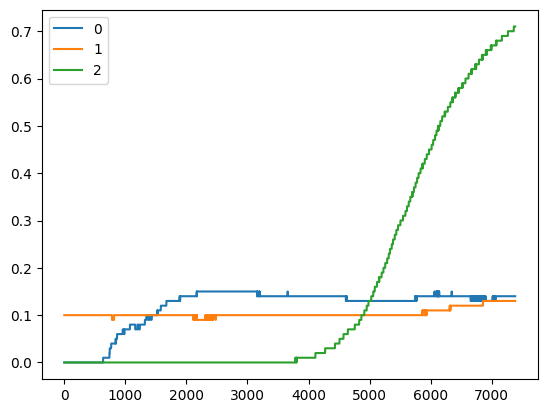

GCN_metrics/GAT254_randScore.npy


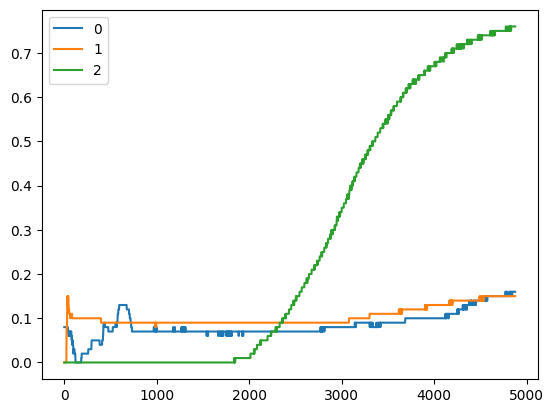

GCN_metrics/GAT43_randScore.npy


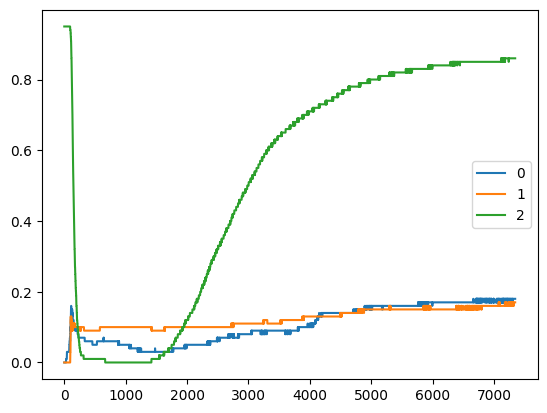

GCN_metrics/GAT36_randScore.npy


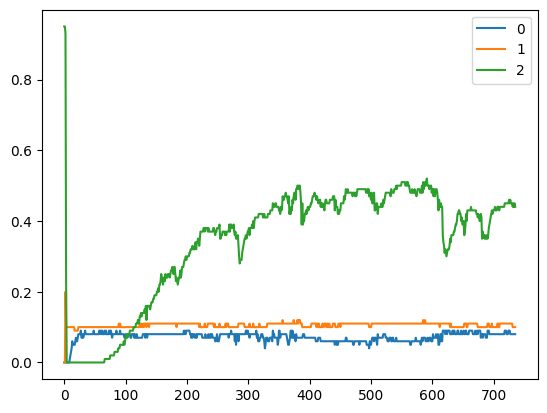

GCN_metrics/GAT420_randScore.npy


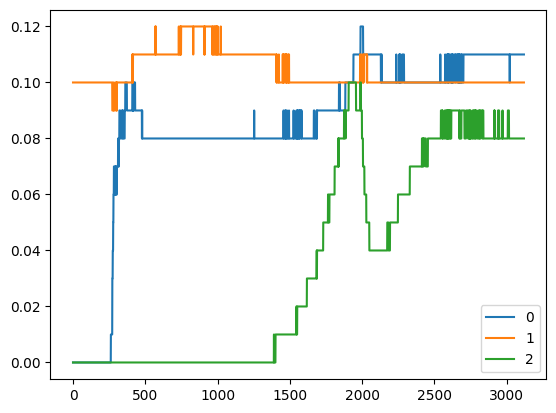

GCN_metrics/GAT95_randScore.npy


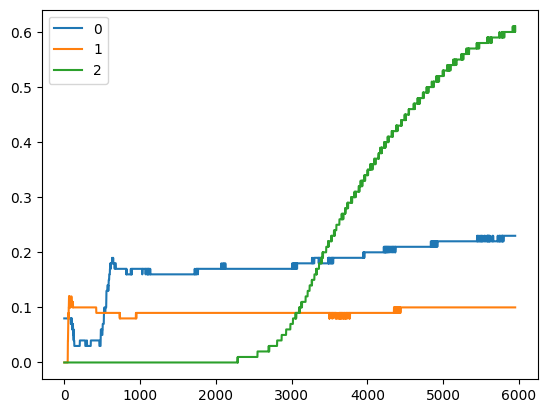

In [199]:
dropout = []
learning_rate = []
num_layers = []
hidden_channels = []
batch_size = []
model = []

for file in best_runs:
    class_repo = np.load(re.sub('_randScore','_classRepo',file))
    _class_repo = []
    for tmp in class_repo:
        _ = np.array(tmp.split('\n'))[np.array([0,2,3,4,6,7,8])][0].split(' ')
        _ = list(filter(None, _))
        _df = pd.DataFrame(columns = _)
        for i in np.array([1,2,3,5,6]):
            __ = list(filter(None,np.array(tmp.split('\n'))[np.array([0,2,3,4,6,7,8])][i].split('  ')))
            _df2 = pd.DataFrame([__[1:]], columns = _, index = [__[0]])
            _df = pd.concat([_df,_df2])
        _class_repo.append(_df)
    f10 = []
    f11 = []
    f12 = []
    for i in _class_repo:
        f10.append(np.array(i['f1-score']).astype(float)[0])
        f11.append(np.array(i['f1-score']).astype(float)[1])
        f12.append(np.array(i['f1-score']).astype(float)[2])
    print(file)
    param_file = re.sub('_randScore.npy','.pickle',re.sub('GCN_metrics','hyperparameter_pickle_files',file))
    with open(param_file, 'rb') as handle:
        params = pickle.load(handle)
    dropout.append(params['dropout'])
    learning_rate.append(params['learning_rate'])
    num_layers.append(params['num_layers'])
    hidden_channels.append(params['hidden_channels'])
    batch_size.append(params['batch_size'])
    model.append(file.split('/')[1][0:3])
    plt.plot(f10,label = '0')
    plt.plot(f11,label = '1')
    plt.plot(f12,label = '2')
    plt.legend()
    plt.show()

In [193]:
np.unique(dropout, return_counts = True)

(array([0.05, 0.1 , 0.2 ]), array([26, 21, 20]))

In [194]:
np.unique(learning_rate, return_counts = True)

(array([5.e-06, 1.e-05, 5.e-05]), array([21, 25, 21]))

In [195]:
np.unique(num_layers, return_counts = True)

(array([ 4,  6,  8, 10, 20]), array([ 9, 13, 21,  9, 15]))

In [196]:
np.unique(hidden_channels, return_counts = True)

(array([16, 32]), array([23, 44]))

In [197]:
np.unique(batch_size, return_counts = True)

(array(['batch_size'], dtype='<U10'), array([67]))

In [198]:
np.unique(model, return_counts = True)

(array(['GAT', 'GCN'], dtype='<U3'), array([52, 15]))

In [146]:
_df

,precision,recall,f1-score,support
0.0,0.00,0.00,0.00,604
1.0,0.05,1.00,0.10,688
2.0,0.00,0.00,0.00,12372
macro avg,0.02,0.33,0.03,13664
weighted avg,0.00,0.05,0.00,13664


In [131]:
print(tmp)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       604
         1.0       0.05      1.00      0.10       688
         2.0       0.00      0.00      0.00     12372

    accuracy                           0.05     13664
   macro avg       0.02      0.33      0.03     13664
weighted avg       0.00      0.05      0.00     13664

